## PROBLEM STATEMENT :

#### - Leading nutrition and supplement retail chain offers a comprehensive range of products for all your wellness and fitness needs. 

#### - It follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

#### - Effective forecasting for store sales gives essential insights into upcoming cash flow, meaning the Retail company can more accurately plan the cashflow at store level.

#### - Sales data for 18 months from 365 stores is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday.


## OBJECTIVE :

#### - To predict the store sales for each store for the next two months.

#### - Need to build Time series forecasting models based on past sales and several other categorical features 

## TABLE OF CONTENTS :

#### 1. Importing the Libraries
#### 2. Data Distribution and EDA
#### 3. Feature Engineering (Addition of Date Variables)
#### 4. Model Build and Model Evaluation
#### 5. Model Inference and Sales Forecast

## 1. Importing the Libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
import xgboost as xg
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [ ]:
train_df = pd.read_csv('/content/TRAIN.csv')
test_df = pd.read_csv('/content/TEST_FINAL.csv')

## 2. DATA DISTRIBUTION

In [ ]:
train_df.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20


In [ ]:
test_df.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No


## 2(a) - EDA using all the features

In [ ]:
CLASS_LABEL = 'Sales'
print(f'\nTrain contains {train_df.shape[0]} samples and {train_df.shape[1]} variables')
print(f'\nTest contains {test_df.shape[0]} samples and {test_df.shape[1]} variables')


Train contains 188340 samples and 10 variables

Test contains 22265 samples and 8 variables


## 2(b) - Lets check for nulls in the dataset

In [ ]:
nulls=[]
for i in train_df.columns:
  nul=train_df[i].isnull().sum()
  nulls.append(nul)
pd.DataFrame({'columns':train_df.columns,'missing values':nulls})

,columns,missing values
0,ID,0
1,Store_id,0
2,Store_Type,0
3,Location_Type,0
4,Region_Code,0
5,Date,0
6,Holiday,0
7,Discount,0
8,#Order,0
9,Sales,0


## 2(c) - Lets visualize the data using boxplots

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

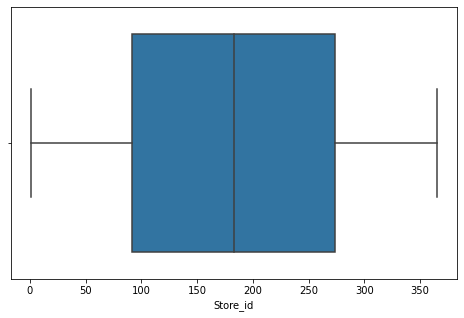

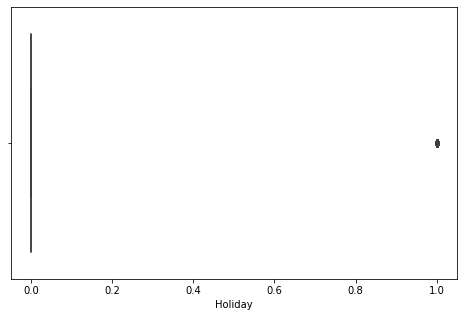

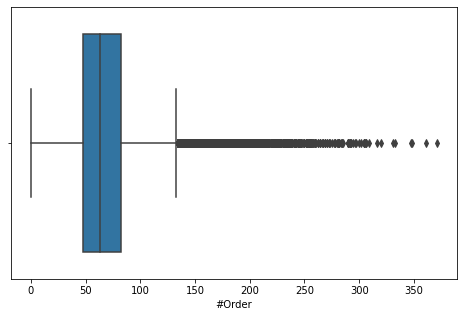

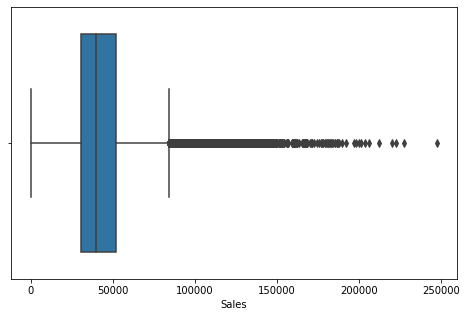

In [ ]:
for i in train_df.describe().columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(train_df[i])

## 2(d) - Lets use Hist plots to check the data distribution

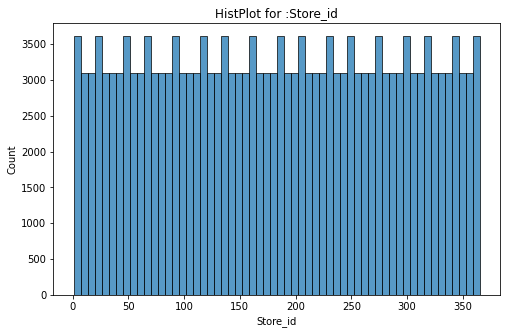

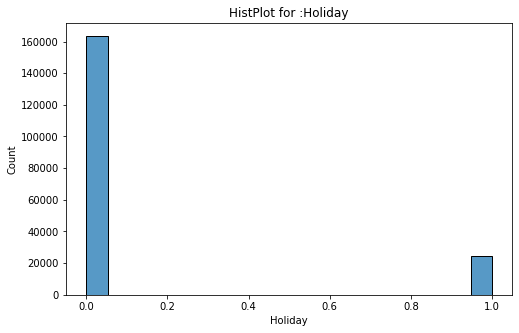

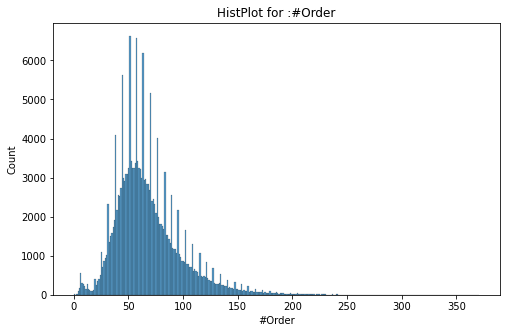

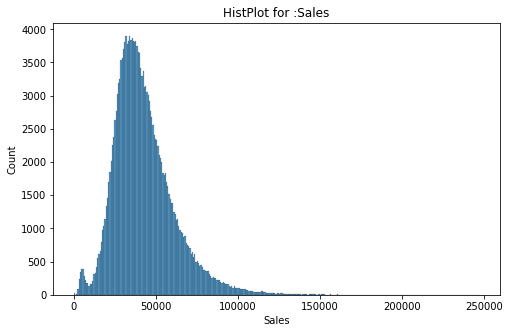

In [ ]:
for i in train_df.describe().columns:
  plt.figure(figsize=(8,5))
  plt.title('HistPlot for :'+i)
  sns.histplot(train_df[i])

## 2(e) - Lets Visualize the categorical data using Countplots


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

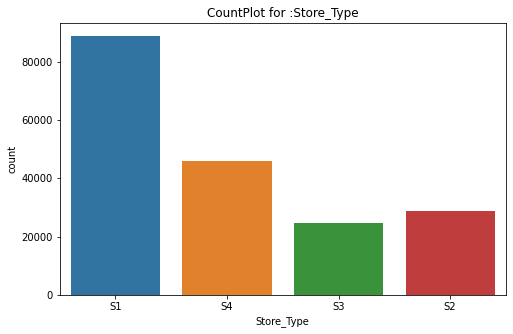

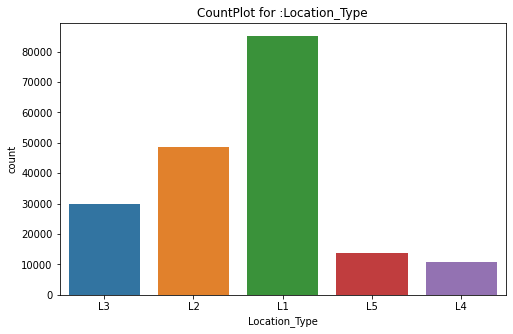

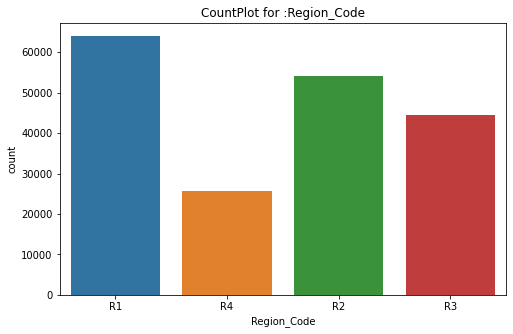

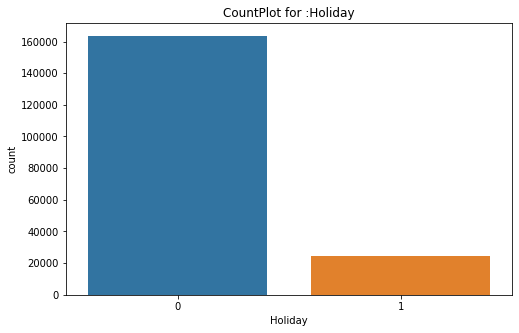

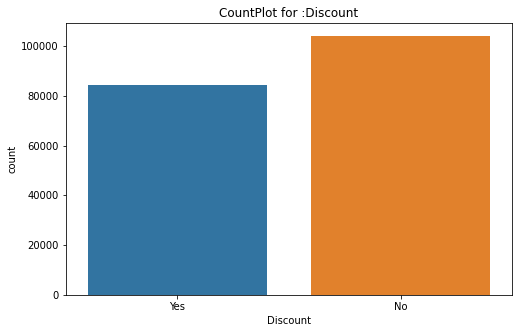

In [ ]:
for i in train_df[['Store_Type','Location_Type','Region_Code','Holiday','Discount']]:
  plt.figure(figsize=(8,5))
  plt.title('CountPlot for :'+i)
  sns.countplot(train_df[i])

## 2(f) - Region wise sales Avg

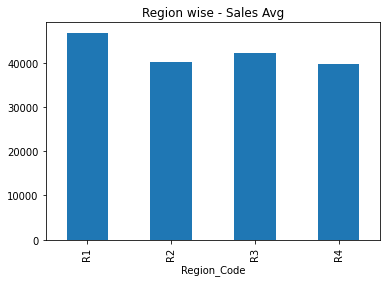

In [ ]:
train_df.groupby('Region_Code')['Sales'].mean().plot(kind='bar',title='Region wise - Sales Avg')

## 2(g) - Location wise sales Avg

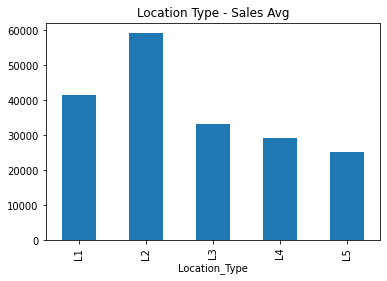

In [ ]:
train_df.groupby('Location_Type')['Sales'].mean().plot(kind='bar',title='Location Type - Sales Avg')

## 2(h) - Store Type wise sales Avg

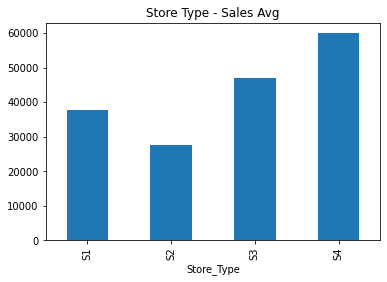

In [ ]:
train_df.groupby('Store_Type')['Sales'].mean().plot(kind='bar',title='Store Type - Sales Avg')

## 3.Feature Engineering (Addition of Date Variables)

### Lets add more feature using date variables and see how the sales impact based on certain dates.

In [ ]:
def weekday_fet(x):
   return pd.to_datetime(x).weekday()

In [ ]:
train_df['weekday']=train_df['Date'].apply(weekday_fet)

In [ ]:
def month_fet(x):
   return pd.to_datetime(x).month
train_df['month']=train_df['Date'].apply(month_fet)

def day_fet(x):
   return pd.to_datetime(x).day
train_df['day']=train_df['Date'].apply(day_fet)

In [ ]:
train_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,weekday,month,day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,0,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,0,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,0,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,0,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,0,1,1


## 3(a) - Weekday wise analysis

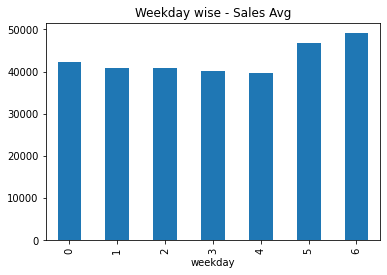

In [ ]:
train_df.groupby('weekday')['Sales'].mean().plot(kind='bar',title='Weekday wise - Sales Avg')

## 3(b) - We can see specifically on weekend

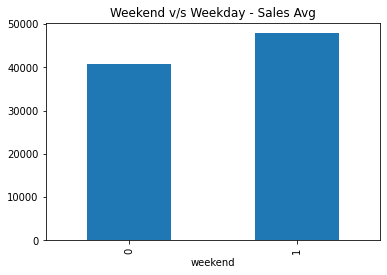

In [ ]:
def isweekend(x):
  if x==5 or x==6:
    return 1
  else:
    return 0
train_df['weekend']=train_df['weekday'].apply(isweekend)
train_df.groupby('weekend')['Sales'].mean().plot(kind='bar',title='Weekend v/s Weekday - Sales Avg')

## 3(c) - Month wise Sales Avg Analysis

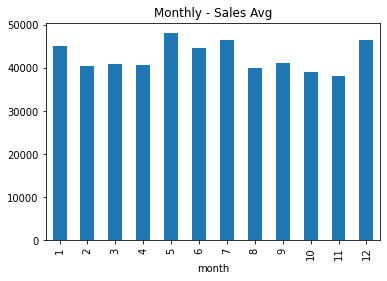

In [ ]:
train_df.groupby('month')['Sales'].mean().plot(kind='bar',title='Monthly - Sales Avg')

## 3(d) - Day wise Sales Avg Analysis

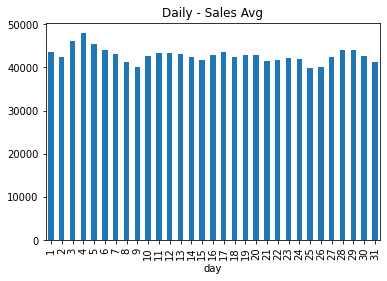

In [ ]:
train_df.groupby('day')['Sales'].mean().plot(kind='bar',title='Daily - Sales Avg')

In [ ]:
train_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,weekday,month,day,weekend
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,0,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,0,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,0,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,0,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,0,1,1,0


In [ ]:
train_df.shape

(188340, 14)

#### Removing Data where Sales are less than 0

In [ ]:
train_df=train_df[train_df['Sales']>0]

In [ ]:
train_df.shape

(188321, 14)

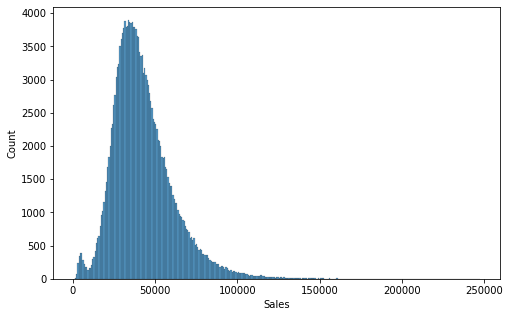

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['Sales'])

In [ ]:
train_df.describe()

,Store_id,Holiday,#Order,Sales,weekday,month,day,weekend
count,188321.000000,188321.000000,188321.000000,188321.000000,188321.000000,188321.000000,188321.000000,188321.000000
mean,182.998880,0.131770,68.212573,42788.644559,2.990394,5.497884,15.692286,0.282958
std,105.364704,0.338241,30.461248,18452.635280,1.997542,3.399400,8.783037,0.450438
min,1.000000,0.000000,1.000000,708.120000,0.000000,1.000000,1.000000,0.000000
25%,92.000000,0.000000,48.000000,30429.000000,1.000000,3.000000,8.000000,0.000000
50%,183.000000,0.000000,63.000000,39678.000000,3.000000,5.000000,16.000000,0.000000
75%,274.000000,0.000000,82.000000,51909.000000,5.000000,8.000000,23.000000,1.000000
max,365.000000,1.000000,371.000000,247215.000000,6.000000,12.000000,31.000000,1.000000


### Checking Percentile Distribution of Sales Data

In [ ]:
print("01th percentile of arr : ",np.percentile(train_df['Sales'], 1))
print("05th percentile of arr : ",np.percentile(train_df['Sales'], 5))
print("25th percentile of arr : ",np.percentile(train_df['Sales'], 25))
print("50th percentile of arr : ",np.percentile(train_df['Sales'], 50))
print("75th percentile of arr : ",np.percentile(train_df['Sales'], 75))
print("90th percentile of arr : ",np.percentile(train_df['Sales'], 90))
print("95th percentile of arr : ",np.percentile(train_df['Sales'], 95))
print("99th percentile of arr : ",np.percentile(train_df['Sales'], 99))
print("100th percentile of arr : ",np.percentile(train_df['Sales'], 100))

01th percentile of arr :  7147.848000000001
05th percentile of arr :  19202.76
25th percentile of arr :  30429.0
50th percentile of arr :  39678.0
75th percentile of arr :  51909.0
90th percentile of arr :  66282.45000000001
95th percentile of arr :  76815.0
99th percentile of arr :  102159.0
100th percentile of arr :  247215.0


### Picking the data between 1 to 99th Percentile of Data

In [ ]:
T=train_df[['Sales']]
Q1 = T.quantile(0.25)
print('Q1',Q1)
Q3 = T.quantile(0.75)
print('Q3',Q3)
Q_01 = T.quantile(0.01)
print('Q_01',Q_01)
Q_99 = T.quantile(0.99)
print('Q_99',Q_99)
IQR = Q_99 - Q_01
print("Outlier threshold of Appliances ",IQR)

dfOutlier=T.describe()
outlierSet=set()

Q1 Sales    30429.0
Name: 0.25, dtype: float64
Q3 Sales    51909.0
Name: 0.75, dtype: float64
Q_01 Sales    7147.848
Name: 0.01, dtype: float64
Q_99 Sales    102159.0
Name: 0.99, dtype: float64
Outlier threshold of Appliances  Sales    95011.152
dtype: float64


In [ ]:
filtered_values = np.where((train_df['Sales']>=7147.848) & (train_df['Sales']<= 102159.0) )
print(filtered_values)

(array([     1,      2,      3, ..., 188318, 188319, 188320]),)


In [ ]:
train_df=train_df.loc[(train_df['Sales']>=7147.848) & (train_df['Sales']< 102159)]

In [ ]:
train_df.shape

(184552, 14)

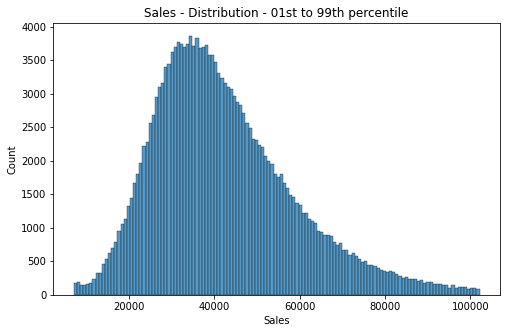

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Sales - Distribution - 01st to 99th percentile')
sns.histplot(train_df['Sales'])

## Transforming the Sales feature to Log of Sales to see the distribution


In [ ]:
X=train_df.drop('Sales',axis=1)
y=np.log10(train_df['Sales'])

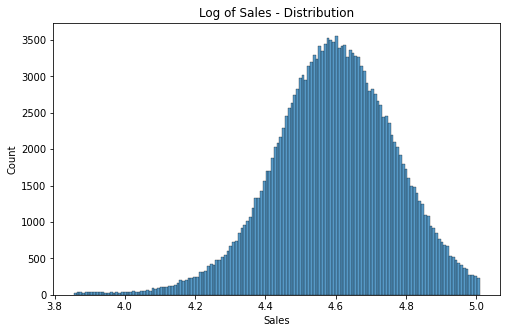

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Log of Sales - Distribution')
sns.histplot(y)

## 4. Model Build and Model Evaluation

In [ ]:
train_df_new=pd.get_dummies(train_df,columns=['Store_Type','Location_Type','Region_Code','Discount','Store_id'])

In [ ]:
train_df_new.drop(['Date','ID','weekday','month','day','#Order'],axis=1,inplace=True)

In [ ]:
train_df_new.head()

,Holiday,Sales,weekend,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Store_id_1,Store_id_2,Store_id_3,Store_id_4,Store_id_5,Store_id_6,Store_id_7,Store_id_8,Store_id_9,Store_id_10,Store_id_11,Store_id_12,Store_id_13,Store_id_14,Store_id_15,Store_id_16,Store_id_17,Store_id_18,Store_id_19,Store_id_20,Store_id_21,Store_id_22,...,Store_id_326,Store_id_327,Store_id_328,Store_id_329,Store_id_330,Store_id_331,Store_id_332,Store_id_333,Store_id_334,Store_id_335,Store_id_336,Store_id_337,Store_id_338,Store_id_339,Store_id_340,Store_id_341,Store_id_342,Store_id_343,Store_id_344,Store_id_345,Store_id_346,Store_id_347,Store_id_348,Store_id_349,Store_id_350,Store_id_351,Store_id_352,Store_id_353,Store_id_354,Store_id_355,Store_id_356,Store_id_357,Store_id_358,Store_id_359,Store_id_360,Store_id_361,Store_id_362,Store_id_363,Store_id_364,Store_id_365
1,1,51789.12,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,36868.20,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19715.16,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,45614.52,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,34211.22,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=train_df_new.drop('Sales',axis=1)
y=np.log10(train_df_new['Sales'])

In [ ]:
X.head(5)

,Holiday,weekend,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Store_id_1,Store_id_2,Store_id_3,Store_id_4,Store_id_5,Store_id_6,Store_id_7,Store_id_8,Store_id_9,Store_id_10,Store_id_11,Store_id_12,Store_id_13,Store_id_14,Store_id_15,Store_id_16,Store_id_17,Store_id_18,Store_id_19,Store_id_20,Store_id_21,Store_id_22,Store_id_23,...,Store_id_326,Store_id_327,Store_id_328,Store_id_329,Store_id_330,Store_id_331,Store_id_332,Store_id_333,Store_id_334,Store_id_335,Store_id_336,Store_id_337,Store_id_338,Store_id_339,Store_id_340,Store_id_341,Store_id_342,Store_id_343,Store_id_344,Store_id_345,Store_id_346,Store_id_347,Store_id_348,Store_id_349,Store_id_350,Store_id_351,Store_id_352,Store_id_353,Store_id_354,Store_id_355,Store_id_356,Store_id_357,Store_id_358,Store_id_359,Store_id_360,Store_id_361,Store_id_362,Store_id_363,Store_id_364,Store_id_365
1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,)

In [ ]:
model_ran=RandomForestRegressor(n_estimators=100,criterion='mse')
model_ran.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [ ]:
y_train_pred=model_ran.predict(X_train)
print(mean_squared_log_error(10**y_train,10**y_train_pred))
print(mean_squared_error(10**y_train,10**y_train_pred))

y_pred=model_ran.predict(X_test)
print(mean_squared_log_error(10**y_test,10**y_pred))
print(mean_squared_error(10**y_test,10**y_pred))

0.0511476978792522
84024775.52296305
0.05384188331368316
90057664.75238174


## Creating Required Features for Test data and fitting the model to predict the sales

In [ ]:
test_df.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No


In [ ]:
test_df['weekday']=test_df['Date'].apply(weekday_fet)
def isweekend(x):
  if x==5 or x==6:
    return 1
  else:
    return 0
test_df['weekend']=test_df['weekday'].apply(isweekend)
test_df.drop('weekday',axis=1,inplace=True)

In [ ]:
test_df_new=pd.get_dummies(test_df,columns=['Store_Type','Location_Type','Region_Code','Discount','Store_id'])
test_df_new.drop(['ID','Date'],axis=1,inplace=True)

In [ ]:
test_df_new.shape

(22265, 382)

## 5. Model Inference and Sales Forecast

In [ ]:
y_ans=model_ran.predict(test_df_new)
y_inv_ans=10**y_ans

In [ ]:
res=pd.DataFrame({'ID':test_df['ID'],'Sales':y_inv_ans})

In [ ]:
res.to_csv('/content/SALES_PRED.csv', index=False)

In [ ]:
res

,ID,Sales
0,T1188341,51364.865588
1,T1188342,39600.674533
2,T1188343,76235.661637
3,T1188344,36853.540185
4,T1188345,39871.033674
...,...,...
22260,T1210601,18757.611838
22261,T1210602,53420.171784
22262,T1210603,45757.863796
22263,T1210604,30089.082258
